# PISA 2012
**by Sanatbek Matlatipov**

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a>
    <ul>
        <li><a id='#gather'>Gathering</a></li>
        <li><a id='#assess'>Assessing</a></li>
        <li><a id='#clean'>Cleaning</a></li>
    </ul>
</li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Brief intro
PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It seems that PISA 2012 survey is about how well student is prepared for life beyond school rather than just how well student have observed school lessons. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. 

<a id='wrangling'></a>
## Data Wrangling
Firstly, I am going to **gather** the data , then **assess** it and finally I am **cleaning** as well as **saving** the data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

<a id='gather'></a>
### Gathering

> The dataset has 636 columns and 485490 rows. I will start by analayzing as much column as I can. In the final version, I've planned to filter columns between 40 to 50 out of 636.

In [6]:
!wget https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip

--2021-09-19 08:10:26--  https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.143.126
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.143.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341117417 (325M) [application/zip]
Saving to: ‘pisa2012.csv.zip’

pisa2012.csv.zip    100%[===================>] 325.31M   132KB/s    in 33m 37s 

2021-09-19 08:44:04 (165 KB/s) - ‘pisa2012.csv.zip’ saved [341117417/341117417]



In [5]:
!unzip pisa2012.csv.zip # using linux unzip command to extract compressed file

Archive:  pisa2012.csv.zip
  inflating: pisa2012.csv            


In [7]:
df=pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1") # pisa2012 dataset is assessed to df

/Users/sanatbek/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (15,16,17,21,22,23,24,25,26,30,31,36,37,45,65,123,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,475) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
!wget https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv

--2021-09-19 08:47:48--  https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.48.206
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.48.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33844 (33K) [application/octet-stream]
Saving to: ‘pisadict2012.csv’

pisadict2012.csv    100%[===================>]  33.05K   186KB/s    in 0.2s    

2021-09-19 08:47:49 (186 KB/s) - ‘pisadict2012.csv’ saved [33844/33844]



In [20]:
#https://www.oecd.org/pisa/pisaproducts/PISA12_stu_codebook.pdf
df_dict = pd.read_csv('pisadict2012.csv')
df_dict.head()

,Unnamed: 0,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code


In [8]:
df.head() 

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


<a id='assess'></a>
### Assessing

In [47]:
df.shape
print ("Database has {} columns and {} rows.".format(df.shape[1], df.shape[0]))

Database has 636 columns and 485490 rows.


In [17]:
# to see existing column names in the pisa2012 dataset
for column in df.columns: 
    print(column) 

Unnamed: 0
CNT
SUBNATIO
STRATUM
OECD
NC
SCHOOLID
STIDSTD
ST01Q01
ST02Q01
ST03Q01
ST03Q02
ST04Q01
ST05Q01
ST06Q01
ST07Q01
ST07Q02
ST07Q03
ST08Q01
ST09Q01
ST115Q01
ST11Q01
ST11Q02
ST11Q03
ST11Q04
ST11Q05
ST11Q06
ST13Q01
ST14Q01
ST14Q02
ST14Q03
ST14Q04
ST15Q01
ST17Q01
ST18Q01
ST18Q02
ST18Q03
ST18Q04
ST19Q01
ST20Q01
ST20Q02
ST20Q03
ST21Q01
ST25Q01
ST26Q01
ST26Q02
ST26Q03
ST26Q04
ST26Q05
ST26Q06
ST26Q07
ST26Q08
ST26Q09
ST26Q10
ST26Q11
ST26Q12
ST26Q13
ST26Q14
ST26Q15
ST26Q16
ST26Q17
ST27Q01
ST27Q02
ST27Q03
ST27Q04
ST27Q05
ST28Q01
ST29Q01
ST29Q02
ST29Q03
ST29Q04
ST29Q05
ST29Q06
ST29Q07
ST29Q08
ST35Q01
ST35Q02
ST35Q03
ST35Q04
ST35Q05
ST35Q06
ST37Q01
ST37Q02
ST37Q03
ST37Q04
ST37Q05
ST37Q06
ST37Q07
ST37Q08
ST42Q01
ST42Q02
ST42Q03
ST42Q04
ST42Q05
ST42Q06
ST42Q07
ST42Q08
ST42Q09
ST42Q10
ST43Q01
ST43Q02
ST43Q03
ST43Q04
ST43Q05
ST43Q06
ST44Q01
ST44Q03
ST44Q04
ST44Q05
ST44Q07
ST44Q08
ST46Q01
ST46Q02
ST46Q03
ST46Q04
ST46Q05
ST46Q06
ST46Q07
ST46Q08
ST46Q09
ST48Q01
ST48Q02
ST48Q03
ST48Q04
ST48Q05
ST49Q0

In [36]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [48]:
# number of duplicates in the dataset
df.duplicated().sum()

0

In [54]:
# All null value rows
null_existing_rows = df.isnull().sum(axis = 0).max()
null_existing_rows

472209

In [55]:
print('non-null values in the dataset: ', df.shape[0] - null_existing_rows)

non-null values in the dataset:  13281


<a id='overall_structure'></a>
### Overall sturcture of the dataset

In [27]:
for index, row in df_dict.iterrows():
    print(row[0], '-- ', row["x"])

CNT --  Country code 3-character
SUBNATIO --  Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
STRATUM --  Stratum ID 7-character (cnt + region ID + original stratum ID)
OECD --  OECD country
NC --  National Centre 6-digit Code
SCHOOLID --  School ID 7-digit (region ID + stratum ID + 3-digit school ID)
STIDSTD --  Student ID
ST01Q01 --  International Grade
ST02Q01 --  National Study Programme
ST03Q01 --  Birth - Month
ST03Q02 --  Birth -Year
ST04Q01 --  Gender
ST05Q01 --  Attend <ISCED 0>
ST06Q01 --  Age at <ISCED 1>
ST07Q01 --  Repeat - <ISCED 1>
ST07Q02 --  Repeat - <ISCED 2>
ST07Q03 --  Repeat - <ISCED 3>
ST08Q01 --  Truancy - Late for School
ST09Q01 --  Truancy - Skip whole school day
ST115Q01 --  Truancy - Skip classes within school day
ST11Q01 --  At Home - Mother
ST11Q02 --  At Home - Father
ST11Q03 --  At Home - Brothers
ST11Q04 --  At Home - Sisters
ST11Q05 --  At Home - Grandparents
ST11Q06 --  At Home - Others
ST13Q01 --  Mother<Highes

W_FSTR39 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT39
W_FSTR40 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT40
W_FSTR41 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT41
W_FSTR42 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT42
W_FSTR43 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT43
W_FSTR44 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT44
W_FSTR45 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT45
W_FSTR46 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT46
W_FSTR47 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT47
W_FSTR48 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT48
W_FSTR49 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT49
W_FSTR50 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT50
W_FSTR51 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT51
W_FSTR52 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT52
W_FSTR53 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT53
W_FSTR54 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT54
W_FSTR55 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT55
W_FSTR56 --  FINAL STUDENT REPLICATE BRR-FAY WEIGHT56
W_FSTR57 --  FINAL STUDENT R

### Below, I am going to review the dataset by grouping them as much as possible.
In that way, I can assess it easily.
1. **First Group to assess** <br>
    - `CNT` - Country code <br>
    - `SUBNATIO` --  Adjudicated sub-region code 7-digit code (3-digit country code + region ID + stratum ID)
    - `STRATUM` --  Stratum ID 7-character (cnt + region ID + original stratum ID)
    - `OECD` --  OECD country
    - `NC` --  National Centre 6-digit Code
    - `SCHOOLID` --  School ID 7-digit (region ID + stratum ID + 3-digit school ID)
    - `STIDSTD` --  Student ID
    - `ST01Q01` --  International Grade
    - `ST02Q01` --  National Study Programme
    - `ST03Q01` --  Birth - Month
    - `ST03Q02` --  Birth -Year
    - `ST04Q01` --  Gender
    - `ST05Q01` --  Attend <ISCED 0>
    - `ST06Q01` --  Age at <ISCED 1>
    - `ST07Q01` --  Repeat - <ISCED 1>
    - `ST07Q02` --  Repeat - <ISCED 2>
    - `ST07Q03` --  Repeat - <ISCED 3>
    - `ST08Q01` --  Truancy - Late for School
    - `ST09Q01` --  Truancy - Skip whole school day
    - `ST115Q01` -- Truancy - Skip classes within school day

In [71]:
first_group = ['CNT', 'SUBNATIO', 'OECD', 'NC', 'SCHOOLID', 'STIDSTD', 'ST01Q01', 'ST02Q01', 'ST03Q01', 'ST03Q02', 'ST04Q01', 'ST05Q01', 'ST06Q01', 'ST07Q01', 'ST07Q02', 'ST07Q03', 'ST08Q01', 'ST09Q01', 'ST115Q01']
df[first_group].head(2)

,CNT,SUBNATIO,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01
0,Albania,80000,Non-OECD,Albania,1,1,10,1.0,2,1996,Female,No,6.0,"No, never","No, never","No, never",None,None,1.0
1,Albania,80000,Non-OECD,Albania,1,2,10,1.0,2,1996,Female,"Yes, for more than one year",7.0,"No, never","No, never","No, never",One or two times,None,1.0


In [65]:
df[first_group].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CNT       485490 non-null  object 
 1   SUBNATIO  485490 non-null  int64  
 2   OECD      485490 non-null  object 
 3   NC        485490 non-null  object 
 4   SCHOOLID  485490 non-null  int64  
 5   STIDSTD   485490 non-null  int64  
 6   ST01Q01   485490 non-null  int64  
 7   ST02Q01   485438 non-null  float64
 8   ST03Q01   485490 non-null  int64  
 9   ST03Q02   485490 non-null  int64  
 10  ST04Q01   485490 non-null  object 
 11  ST05Q01   476166 non-null  object 
 12  ST06Q01   457994 non-null  float64
 13  ST07Q01   436690 non-null  object 
 14  ST07Q02   431278 non-null  object 
 15  ST07Q03   305687 non-null  object 
 16  ST08Q01   479143 non-null  object 
 17  ST09Q01   479131 non-null  object 
 18  ST115Q01  479269 non-null  float64
dtypes: float64(3), int64(6), object(10)
memory u

In [66]:
df[first_group].describe()

,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01
count,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000
mean,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356
std,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992
min,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000
25%,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000
50%,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000
75%,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000
max,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000


In [69]:
df['CNT'].value_counts()[:3]

Mexico    33806
Italy     31073
Spain     25313
Name: CNT, dtype: int64

 - `Mexico` is the most common country followed by `Italy` and `Spain`

In [73]:
df['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [78]:
df.OECD.value_counts()

OECD        295416
Non-OECD    190074
Name: OECD, dtype: int64

In [83]:
# To check if the dataset have some duplicated students
df.STIDSTD.value_counts()[df.STIDSTD.value_counts() > 1]

138      68
81       68
94       68
214      68
93       68
         ..
28346     2
30845     2
30393     2
28238     2
28720     2
Name: STIDSTD, Length: 31073, dtype: int64

It seems we have `31073` duplicated students. 
Picking most duplicated student ID(128) in the following

In [85]:
df[first_group].query('STIDSTD == 128').sample(15)

,CNT,SUBNATIO,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01
216706,Hungary,3480000,OECD,Hungary,5,128,10,5.0,1,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0
461110,Tunisia,7880000,Non-OECD,Tunisia,6,128,8,1.0,1,1996,Female,No,6.0,"Yes, twice or more","Yes, twice or more",NaN,Three or four times,One or two times,2.0
145710,Spain,7241400,OECD,Spain,6,128,10,1.0,1,1996,Female,"Yes, for more than one year",6.0,"No, never","No, never",NaN,None,None,1.0
389378,Qatar,6340000,Non-OECD,Qatar,3,128,10,3.0,7,1996,Female,"Yes, for one year or less",6.0,"No, never","No, never","No, never",None,None,1.0
417672,Russian Federation,6430000,Non-OECD,Russian Federation,5,128,9,1.0,8,1996,Male,"Yes, for one year or less",7.0,"No, never","No, never",NaN,Five or more times,Five or more times,4.0
383656,Portugal,6200000,OECD,Portugal,5,128,10,2.0,11,1996,Male,"Yes, for more than one year",5.0,"No, never","No, never","No, never",One or two times,None,1.0
278828,Japan,3920000,OECD,Japan,4,128,10,3.0,10,1996,Male,"Yes, for more than one year",6.0,NaN,NaN,NaN,None,None,1.0
443722,Sweden,7520000,OECD,Sweden,7,128,9,1.0,4,1996,Female,No,6.0,"No, never","No, never","No, never",One or two times,One or two times,2.0
296020,Liechtenstein,4380000,Non-OECD,Liechtenstein,3,128,9,11.0,3,1996,Male,"Yes, for more than one year",6.0,"No, never","No, never","No, never",None,None,1.0
235662,Israel,3760000,OECD,Israel,4,128,10,6.0,12,1996,Male,"Yes, for one year or less",6.0,"No, never","No, never","No, never",One or two times,None,1.0


 - Eventhough we have same student IDs, it doesn't mean they are same student. So, we will remove the column.

In [94]:
# to check if the ST01Q01(internaltional grade) have null values
pd.isnull(df.ST01Q01).sum()

0

In [99]:
# to check if birth year have null values
pd.isnull(df.ST03Q02).sum()

0

In [97]:
# to check if genderr have null values and count distribution of gender
print(pd.isnull(df.ST04Q01).sum())
df.ST04Q01.value_counts()

0


Female    245064
Male      240426
Name: ST04Q01, dtype: int64

In [106]:
print(df.ST07Q01.value_counts(), '\n')
print(df.ST07Q02.value_counts(), '\n')
print(df.ST07Q03.value_counts())

No, never             401264
Yes, once              30709
Yes, twice or more      4717
Name: ST07Q01, dtype: int64 

No, never             398132
Yes, once              28466
Yes, twice or more      4680
Name: ST07Q02, dtype: int64 

No, never             296759
Yes, once               8116
Yes, twice or more       812
Name: ST07Q03, dtype: int64


`Male` and `Female` genders are evenly distributed in the dataset.

2. **Second Group to assess** <br>
    - `T11Q01` --  At Home - Mother
    - `ST11Q02` --  At Home - Father
    - `ST11Q03` --  At Home - Brothers
    - `ST11Q04` --  At Home - Sisters
    - `ST11Q05` --  At Home - Grandparents
    - `ST11Q06` --  At Home - Others
    - `ST13Q01` --  Mother -Highest Schooling
    - `ST14Q01` --  Mother Qualifications - ISCED level 6
    - `ST14Q02` --  Mother Qualifications - ISCED level 5A
    - `ST14Q03` --  Mother Qualifications - ISCED level 5B
    - `ST14Q04` --  Mother Qualifications - ISCED level 4
    - `ST15Q01` --  Mother Current Job Status
    - `ST17Q01` --  Father Highest Schooling
    - `ST18Q01` --  Father Qualifications - <ISCED level 6>
    - `ST18Q02` --  Father Qualifications - <ISCED level 5A>
    - `ST18Q03` --  Father Qualifications - <ISCED level 5B>
    - `ST18Q04` --  Father Qualifications - <ISCED level 4>
    - `ST19Q01` --  Father Current Job Status

In [116]:
second_group=['ST11Q01', 'ST11Q02', 'ST11Q03', 'ST11Q04', 'ST11Q05', 'ST11Q06', 'ST13Q01', 'ST14Q01', 'ST14Q02', 'ST14Q03', 'ST14Q04', 'ST15Q01', 'ST17Q01', 'ST18Q01', 'ST18Q02', 'ST18Q03', 'ST18Q04', 'ST19Q01']
df[second_group].head(5)


,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01
0,Yes,Yes,Yes,Yes,NaN,NaN,<ISCED level 3A>,No,No,No,No,"Other (e.g. home duties, retired)",<ISCED level 3A>,NaN,NaN,NaN,NaN,Working part-time <for pay>
1,Yes,Yes,NaN,Yes,NaN,NaN,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>,<ISCED level 3A>,No,No,No,No,Working full-time <for pay>
2,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",Yes,Yes,Yes,No,Working full-time <for pay>,<ISCED level 3A>,Yes,No,Yes,Yes,Working full-time <for pay>
3,Yes,Yes,No,Yes,No,No,"<ISCED level 3B, 3C>",No,No,No,No,Working full-time <for pay>,<ISCED level 3A>,Yes,Yes,No,No,Working full-time <for pay>
4,Yes,Yes,Yes,NaN,NaN,NaN,She did not complete <ISCED level 1>,No,No,No,No,Working part-time <for pay>,"<ISCED level 3B, 3C>",No,No,No,Yes,Working part-time <for pay>


In [114]:
# to clearly see if there are only two values overall
print('At home mother', df.ST11Q01.unique())
print('At home father', df.ST11Q02.unique())
print('At home Brothers', df.ST11Q03.unique())
print('At home Sisters', df.ST11Q04.unique())
print('At home grandparents', df.ST11Q05.unique())
print('At home Others', df.ST11Q05.unique())

At home mother ['Yes' nan 'No']
At home father ['Yes' nan 'No']
At home Brothers ['Yes' nan 'No']
At home Sisters ['Yes' nan 'No']
At home grandparents [nan 'No' 'Yes']
At home Others [nan 'No' 'Yes']


In [119]:
df.ST15Q01.unique()

array(['Other (e.g. home duties, retired) ',
       'Working full-time <for pay> ', 'Working part-time <for pay>',
       'Not working, but looking for a job ', nan], dtype=object)

3. **Third Group to assess** <br>
    ST20Q01 --  Country of Birth International - Self<br>
    ST20Q02 --  Country of Birth International - Mother<br>
    ST20Q03 --  Country of Birth International - Father<br>
    ST21Q01 --  Age of arrival in country of test<br>
    ST25Q01 --  International Language at Home<br>
    ST26Q01 --  Possessions - desk<br>
    ST26Q02 --  Possessions - own room<br>
    ST26Q03 --  Possessions - study place<br>
    ST26Q04 --  Possessions - computer<br>
    ST26Q05 --  Possessions - software<br>
    ST26Q06 --  Possessions - Internet<br>
    ST26Q07 --  Possessions - literature<br>
    ST26Q08 --  Possessions - poetry<br>
    ST26Q09 --  Possessions - art<br>
    ST26Q10 --  Possessions - textbooks<br>
    ST26Q11 --  Possessions - technical reference books<br>
    ST26Q12 --  Possessions - dictionary<br>
    ST26Q13 --  Possessions - dishwasher<br>
    ST26Q14 --  Possessions - DVD<br>
    ST26Q15 --  Possessions - Country item 1<br>
    ST26Q16 --  Possessions - Country item 2<br>
    ST26Q17 --  Possessions - Country item 3<br>
    ST27Q01 --  How many - cellular phones<br>
    ST27Q02 --  How many - televisions<br>
    ST27Q03 --  How many - computers<br>
    ST27Q04 --  How many - cars<br>
    ST27Q05 --  How many - rooms bath or shower<br>
    ST28Q01 --  How many books at home<br>

In [125]:
third_group = ['ST20Q01', 'ST20Q02', 'ST20Q03', 'ST21Q01', 'ST25Q01', 'ST26Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05', 'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10', 'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14']
df[third_group]

,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14
0,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,No,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,Yes
1,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes
3,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No
4,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No
485486,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes
485487,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,No,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,Yes
485488,Country of test,Country of test,Country of test,NaN,Language of the test,Yes,No,Yes,Yes,Yes,Yes,No,No,No,Yes,No,Yes,Yes,Yes


In [123]:
df.ST20Q01.unique()

array(['Country of test', nan, 'Other country'], dtype=object)

3. **Final group to assess** <br>
I have decided to assess `Plausable values`, some of the important chosen columns and skip/drop the rest of the not reviewed columns in the dataset.

In [128]:
final_group = ['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE']
df[final_group].head()

,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,406.8469,376.4683,344.5319,321.1637,381.9209,249.5762,254.3420,406.8496,175.7053,218.5981,341.7009,408.8400,348.2283,367.8105,392.9877
1,486.1427,464.3325,453.4273,472.9008,476.0165,406.2936,349.8975,400.7334,369.7553,396.7618,548.9929,471.5964,471.5964,443.6218,454.8116
2,533.2684,481.0796,489.6479,490.4269,533.2684,401.2100,404.3872,387.7067,431.3938,401.2100,499.6643,428.7952,492.2044,512.7191,499.6643
3,412.2215,498.6836,415.3373,466.7472,454.2842,547.3630,481.4353,461.5776,425.0393,471.9036,438.6796,481.5740,448.9370,474.1141,426.5573
4,381.9209,328.1742,403.7311,418.5309,395.1628,311.7707,141.7883,293.5015,272.8495,260.1405,361.5628,275.7740,372.7527,403.5248,422.1746


### Qulaity and Tideness issues

 - `Florida (USA)`, `Connecticut (USA)`, `Massachusetts (USA)` should be changed to `USA` and `Perm(Russian Federation)` to `Russian Federation`
 - Country's full names should be changed to three character code
 - `ST07Q01`, `ST07Q02`, `ST07Q03` will be merged to one column as `repeat_particpation`. Most frequent one will be chosen.Then, delete  the columns above. 
 - `ST11Q01` and `ST11Q02` will be changed to 0 and 1, if it is `nan` change it to the 1
 - `ST14Q01`, `ST14Q02`, `ST14Q03` and `ST14Q04` merge tables to one column as `mother_qualification`. Most frequent one will be chosen. Then, delete the columns above
 - `ST18Q01`, `ST18Q02`, `ST18Q03` and `ST18Q04` merge tables to one column as `father_qualification`. Most frequent one will be chosen. Then, delete the columns above
 - 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH' -  get the average value and delete columns
 - 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ' - get the average value and delete columns
 - 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE' - get the average value and delete columns
<!--  - `SUBNATIO`, `STARTUM`, `NC`, `SCHOOLID`, `STIDSTD`, `ST02Q01`, `ST03Q01`, `ST05Q01`, `ST06Q01`, `ST11Q03`, `ST11Q04`, `ST11Q05`, `ST13Q01`, `ST26Q15`, `ST26Q16`, `ST26Q17`, `ST27Q01`, `ST27Q02`, `ST27Q03`, `ST27Q04`, `ST27Q05`, `ST28Q01`, `ST29Q01`, `ST29Q02`, `ST29Q03`, `ST29Q04`, `ST29Q05`, `ST29Q06`, `ST29Q07`, `ST29Q08`, `ST35Q01`, `ST35Q02`, `ST35Q03`, `ST35Q04`, `ST35Q05`, `ST35Q06`, `ST37Q01`, `ST37Q02`  columns will be removed -->
 - Work ethic common columns should be selected and  melt to rows and count inside for heatmap 
 - columnn name should be changed to readable format

<a id='clean'></a>
### Cleaning

In [131]:
df_clean = df.copy()

### Define

 - `Florida (USA)`, `Connecticut (USA)`, `Massachusetts (USA)` should be changed to `USA` and `Perm(Russian Federation)` to `Russian Federation`

### Code

In [169]:
df_clean['CNT'] = df_clean['CNT'].replace(['Florida (USA)', 'Connecticut (USA)', 'Massachusetts (USA)'], 'United States of America')
df_clean['CNT'] = df_clean['CNT'].replace(['Perm(Russian Federation)'], 'Russian Federation')
df_clean['CNT'] = df_clean['CNT'].replace(['Hong Kong-China'], 'Hong Kong')
df_clean['CNT'] = df_clean['CNT'].replace(['Macao-China', 'China-Shanghai', 'Chinese Taipei'], 'China')


### Test

In [170]:
df_clean['CNT'].unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong', 'Croatia', 'Hungary',
       'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein', 'Lithuania',
       'Luxembourg', 'Latvia', 'China', 'Mexico', 'Montenegro',
       'Malaysia', 'Netherlands', 'Norway', 'New Zealand', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Russian Federation',
       'United States of America', 'Romania', 'Singapore', 'Serbia',
       'Slovak Republic', 'Slovenia', 'Sweden', 'Thailand', 'Tunisia',
       'Turkey', 'Uruguay', 'Vietnam'], dtype=object)

### Define

 - Country's full names should be changed to three character code. Here I am going to use API Query to get the country code by Country's full name

### Code

In [171]:
import requests

In [172]:
country_full_names = df_clean['CNT'].unique()
country_name_dict = {}

In [173]:
for full_name in country_full_names:
    url = 'https://restcountries.eu/rest/v2/name/' + full_name
    try:
        r = requests.get(url)
        data = r.json()
        print(full_name, ' -- ', data[0]['alpha3Code'])
        country_name_dict[full_name] = data[0]['alpha3Code']
    except requests.exceptions.RequestException as e: 
        print('Error in calling an API', full_name)
    except ValueError:
        print('Error in parrsing reponse JSON', data)

Albania  --  ALB
United Arab Emirates  --  ARE
Argentina  --  ARG
Australia  --  AUS
Austria  --  AUT
Belgium  --  BEL
Bulgaria  --  BGR
Brazil  --  BRA
Canada  --  CAN
Switzerland  --  CHE
Chile  --  CHL
Colombia  --  COL
Costa Rica  --  CRI
Czech Republic  --  CZE
Germany  --  DEU
Denmark  --  DNK
Spain  --  ESP
Estonia  --  EST
Finland  --  FIN
France  --  FRA
United Kingdom  --  GBR
Greece  --  GRC
Hong Kong  --  HKG
Croatia  --  HRV
Hungary  --  HUN
Indonesia  --  IDN
Ireland  --  IRL
Iceland  --  ISL
Israel  --  ISR
Italy  --  ITA
Jordan  --  JOR
Japan  --  JPN
Kazakhstan  --  KAZ
Korea  --  PRK
Liechtenstein  --  LIE
Lithuania  --  LTU
Luxembourg  --  LUX
Latvia  --  LVA
China  --  CHN
Mexico  --  MEX
Montenegro  --  MNE
Malaysia  --  MYS
Netherlands  --  NLD
Norway  --  NOR
New Zealand  --  NZL
Peru  --  PER
Poland  --  POL
Portugal  --  PRT
Qatar  --  QAT
Russian Federation  --  RUS
United States of America  --  USA
Romania  --  ROU
Singapore  --  SGP
Serbia  --  SRB
Slovak Re

In [179]:
df_clean.replace({'CNT': country_name_dict}, inplace=True)

### Test

In [180]:
df_clean['CNT'].unique()

array(['ALB', 'ARE', 'ARG', 'AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN',
       'CHE', 'CHL', 'COL', 'CRI', 'CZE', 'DEU', 'DNK', 'ESP', 'EST',
       'FIN', 'FRA', 'GBR', 'GRC', 'HKG', 'HRV', 'HUN', 'IDN', 'IRL',
       'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'PRK', 'LIE', 'LTU',
       'LUX', 'LVA', 'CHN', 'MEX', 'MNE', 'MYS', 'NLD', 'NOR', 'NZL',
       'PER', 'POL', 'PRT', 'QAT', 'RUS', 'USA', 'ROU', 'SGP', 'SRB',
       'SVK', 'SVN', 'SWE', 'THA', 'TUN', 'TUR', 'URY', 'VNM'],
      dtype=object)

### Define
- ST07Q01, ST07Q02, ST07Q03 will be merged to one column as repeat_particpation. Most frequent one will be chosen.Then, delete the columns above.

In [189]:
df_clean[['ST07Q01', 'ST07Q02', 'ST07Q03']]

,ST07Q01,ST07Q02,ST07Q03
0,"No, never","No, never","No, never"
1,"No, never","No, never","No, never"
2,"No, never","No, never","No, never"
3,"No, never","No, never","No, never"
4,"No, never","No, never","No, never"
...,...,...,...
485485,"No, never","No, never","No, never"
485486,"No, never","No, never","No, never"
485487,"No, never","No, never","No, never"
485488,"No, never","No, never","No, never"


### Code

In [245]:
def get_most_frequent(x, default):
    x = x.dropna()    
    x = x[x.duplicated()]
    first_value = default ## default value for nulls
    for x_value in x:
        if len(x_value) > 0:
            first_value = x_value
    return first_value

In [246]:
df_clean['repeat_particpation'] = df_clean[['ST07Q01', 'ST07Q02', 'ST07Q03']].apply(
    lambda x: get_most_frequent(x, 'No, never'), axis=1)

KeyError: "None of [Index(['ST07Q01', 'ST07Q02', 'ST07Q03'], dtype='object')] are in the [columns]"

In [227]:
df_clean.drop(['ST07Q01', 'ST07Q02', 'ST07Q03'], axis=1, inplace=True)

In [230]:
df_clean.drop('Unnamed: 0', axis=1, inplace=True)

### Test

In [231]:
df_clean['repeat_particpation'].unique()

array(['No, never', 'Yes, once', 'Yes, twice or more'], dtype=object)

In [232]:
df_clean.head(10)

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU,repeat_particpation
0,ALB,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,"No, never"
1,ALB,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,"No, never"
2,ALB,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,"No, never"
3,ALB,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,"No, never"
4,ALB,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,"No, never"
5,ALB,80000,ALB0006,Non-OECD,Albania,1,6,9,1.0,9,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,"No, never"
6,ALB,80000,ALB0006,Non-OECD,Albania,1,7,10,1.0,3,...,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13,"No, never"
7,ALB,80000,ALB0006,Non-OECD,Albania,1,8,10,1.0,6,...,14.6374,15.8728,15.8728,5.2248,15.2579,19,1,0.2322,22NOV13,"No, never"
8,ALB,80000,ALB0006,Non-OECD,Albania,1,9,9,1.0,10,...,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13,"No, never"
9,ALB,80000,ALB0005,Non-OECD,Albania,2,10,10,1.0,8,...,10.1533,3.3844,10.1533,10.1533,10.1533,74,2,0.1594,22NOV13,"No, never"


### Define
ST11Q01 and ST11Q02 will be changed to 0 and 1, if it is nan change it to the 1

### Code

In [233]:
df_clean['ST11Q01'].fillna('Yes', inplace=True)
df_clean['ST11Q01'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_clean['ST11Q02'].fillna('Yes', inplace=True)
df_clean['ST11Q02'].replace({'No': 0, 'Yes': 1}, inplace=True);

### Test

In [235]:
df_clean[['ST11Q01', 'ST11Q02']].head(3)

,ST11Q01,ST11Q02
0,1,1
1,1,1
2,1,1


### Define

 - `ST14Q01`, `ST14Q02`, `ST14Q03` and `ST14Q04` merge tables to one column as `mother_qualification`. Most frequent one will be chosen. Then, delete the columns above

### Code

In [247]:
df_clean['mother_qualification'] = df_clean[['ST14Q01', 'ST14Q02', 'ST14Q03', 'ST14Q04']].apply(
    lambda x: get_most_frequent(x, 'Yes'), axis=1)


### Test

In [250]:
df_clean[['ST14Q01', 'ST14Q02', 'ST14Q04', 'mother_qualification']].head()

,ST14Q01,ST14Q02,ST14Q04,mother_qualification
0,No,No,No,No
1,Yes,Yes,No,Yes
2,Yes,Yes,No,Yes
3,No,No,No,No
4,No,No,No,No


In [248]:
df_clean['mother_qualification'].value_counts()

No     345343
Yes    140147
Name: mother_qualification, dtype: int64

In [254]:
df_clean.drop(['ST14Q01', 'ST14Q02', 'ST14Q03', 'ST14Q04'], axis=1, inplace=True)
df_clean.drop(['ST14Q03'], axis=1, inplace=True)

### Define

 - `ST18Q01`, `ST18Q02`, `ST18Q03` and `ST18Q04` merge tables to one column as `father_qualification`. Most frequent one will be chosen. Then, delete the columns above

### Code

In [255]:
df_clean['father_qualification'] = df_clean[['ST18Q01', 'ST18Q02', 'ST18Q03', 'ST18Q04']].apply(
    lambda x: get_most_frequent(x, 'Yes'), axis=1)

### Test

In [256]:
df_clean[['ST18Q01', 'ST18Q02', 'ST18Q03', 'ST18Q04', 'father_qualification']].head()

,ST18Q01,ST18Q02,ST18Q03,ST18Q04,father_qualification
0,NaN,NaN,NaN,NaN,Yes
1,No,No,No,No,No
2,Yes,No,Yes,Yes,Yes
3,Yes,Yes,No,No,No
4,No,No,No,Yes,No


In [257]:
df_clean['father_qualification'].value_counts()

No     325741
Yes    159749
Name: father_qualification, dtype: int64

### Define
 - 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH' -  get the average value and delete columns
 - 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ' - get the average value and delete columns
 - 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE' - get the average value and delete columns

### Code

In [258]:
#New field: total average score for each subject
df_clean['pv_math_avg_score'] = 0.2 * (df_clean['PV1MATH'] + df_clean['PV2MATH'] + df_clean['PV3MATH'] + df_clean['PV4MATH'] + df_clean['PV5MATH'])
df_clean['pv_reading_avg_score'] = 0.2 *(df_clean['PV1READ'] + df_clean['PV2READ'] + df_clean['PV3READ'] + df_clean['PV4READ'] + df_clean['PV5READ'])
df_clean['pv_science_avg_score'] = 0.2 * (df_clean['PV1SCIE'] + df_clean['PV2SCIE'] + df['PV3SCIE'] + df_clean['PV4SCIE'] + df_clean['PV5SCIE'])
#Remove the original field
df_clean.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ',
                 'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)

### Test

In [259]:
df_clean[['pv_math_avg_score', 'pv_reading_avg_score', 'pv_science_avg_score']].head()


,pv_math_avg_score,pv_reading_avg_score,pv_science_avg_score
0,366.18634,261.01424,371.91348
1,470.56396,384.68832,478.12382
2,505.53824,405.18154,486.60946
3,449.45476,477.46376,453.97240
4,385.50398,256.01010,367.15778


### Define
- delete columns/select neccessary ones

### Code

In [260]:
df_clean = df_clean[['CNT', 'OECD', 'STIDSTD', 'ST01Q01',
                     'ST03Q02', 'ST04Q01', 'ST08Q01', 'ST09Q01', 'ST115Q01',
                    'ST11Q01', 'ST11Q02', 'ST13Q01', 'ST15Q01', 'ST17Q01',
                    'ST19Q01', 'ST20Q01', 'ST20Q02', 'ST20Q03', 'ST21Q01',
                    'ST25Q01', 'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05',
                    'ST26Q06', 'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10',
                    'ST26Q11', 'ST26Q12', 'ST26Q13', 'STUDREL', 'TCHBEHFA',
                    'EXAPPLM', 'EXPUREM', 'WEALTH', 'pv_math_avg_score', 
                    'pv_reading_avg_score', 'pv_science_avg_score', 
                    'father_qualification', 'mother_qualification', 
                    'repeat_particpation']]

### Test

In [261]:
df_clean.head()

,CNT,OECD,STIDSTD,ST01Q01,ST03Q02,ST04Q01,ST08Q01,ST09Q01,ST115Q01,ST11Q01,...,TCHBEHFA,EXAPPLM,EXPUREM,WEALTH,pv_math_avg_score,pv_reading_avg_score,pv_science_avg_score,father_qualification,mother_qualification,repeat_particpation
0,ALB,Non-OECD,1,10,1996,Female,None,None,1.0,1,...,1.3625,NaN,NaN,-2.92,366.18634,261.01424,371.91348,Yes,No,"No, never"
1,ALB,Non-OECD,2,10,1996,Female,One or two times,None,1.0,1,...,NaN,-0.0681,0.7955,0.69,470.56396,384.68832,478.12382,No,Yes,"No, never"
2,ALB,Non-OECD,3,9,1996,Female,None,None,1.0,1,...,NaN,0.5359,0.7955,-0.23,505.53824,405.18154,486.60946,Yes,Yes,"No, never"
3,ALB,Non-OECD,4,9,1996,Female,None,None,1.0,1,...,0.7644,0.3220,0.7955,-1.17,449.45476,477.46376,453.97240,No,No,"No, never"
4,ALB,Non-OECD,5,9,1996,Female,One or two times,None,2.0,1,...,0.7644,NaN,NaN,-1.17,385.50398,256.01010,367.15778,No,No,"No, never"


### Define
- Rename columns to readable format

### Code

In [263]:
df_clean.rename({'CNT': 'country_code', 'OECD': 'oecd_country',
           'STIDSTD': 'student_id', 'ST01Q01':'grade',
           'ST03Q02': 'birth_year', 'ST04Q01': 'gender',
           'ST08Q01': 'late_for_school', 'ST09Q01': 'skip_whole_school_day',
           'ST115Q01': 'skip_classes_within_school_day', 'ST11Q01': 'mother_at_home', 
           'ST11Q02': 'father_at_home', 'ST13Q01': 'mother_highest_schooling',
           'ST15Q01': 'mother_current_job_status', 'ST17Q01': 'father_highest_schooling',
           'ST19Q01': 'father_current_job_status', 'ST20Q01': 'self_birth_country',
           'ST20Q02': 'mother_birth_country', 'ST20Q03': 'father_birth_country',
           'ST21Q01': 'age_of_arrival', 'ST25Q01': 'possessions_desk', 
           'ST26Q02': 'possessions_own_room', 'ST26Q03': 'possessions_study_place',
           'ST26Q04': 'possessions_computer', 'ST26Q05': 'possessions_software',
           'ST26Q06': 'possessions_internet', 'ST26Q07': 'possessions_literature',
           'ST26Q08': 'possessions_poetry', 'ST26Q09': 'possessions_art',
           'ST26Q10': 'possessions_art', 'ST26Q11': 'possessions_technical_reference_books',
           'ST26Q12': 'possessions_dictionary', 'ST26Q13': 'possessions_dvd',
           'STUDREL': 'teacher_student_relations', 'TCHBEHFA': 'teacher_behaviour',
           'EXAPPLM': 'applied_math_experience', 'EXPUREM': 'pure_math_experience',
           'WEALTH': 'Wealth'}, axis='columns', inplace=True)    

/Users/sanatbek/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### Test

In [264]:
df_clean.head()

,country_code,oecd_country,student_id,grade,birth_year,gender,late_for_school,skip_whole_school_day,skip_classes_within_school_day,mother_at_home,...,teacher_behaviour,applied_math_experience,pure_math_experience,Wealth,pv_math_avg_score,pv_reading_avg_score,pv_science_avg_score,father_qualification,mother_qualification,repeat_particpation
0,ALB,Non-OECD,1,10,1996,Female,None,None,1.0,1,...,1.3625,NaN,NaN,-2.92,366.18634,261.01424,371.91348,Yes,No,"No, never"
1,ALB,Non-OECD,2,10,1996,Female,One or two times,None,1.0,1,...,NaN,-0.0681,0.7955,0.69,470.56396,384.68832,478.12382,No,Yes,"No, never"
2,ALB,Non-OECD,3,9,1996,Female,None,None,1.0,1,...,NaN,0.5359,0.7955,-0.23,505.53824,405.18154,486.60946,Yes,Yes,"No, never"
3,ALB,Non-OECD,4,9,1996,Female,None,None,1.0,1,...,0.7644,0.3220,0.7955,-1.17,449.45476,477.46376,453.97240,No,No,"No, never"
4,ALB,Non-OECD,5,9,1996,Female,One or two times,None,2.0,1,...,0.7644,NaN,NaN,-1.17,385.50398,256.01010,367.15778,No,No,"No, never"


In [266]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 43 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   country_code                           485490 non-null  object 
 1   oecd_country                           485490 non-null  object 
 2   student_id                             485490 non-null  int64  
 3   grade                                  485490 non-null  int64  
 4   birth_year                             485490 non-null  int64  
 5   gender                                 485490 non-null  object 
 6   late_for_school                        479143 non-null  object 
 7   skip_whole_school_day                  479131 non-null  object 
 8   skip_classes_within_school_day         479269 non-null  float64
 9   mother_at_home                         485490 non-null  int64  
 10  father_at_home                         485490 non-null  

### Save

In [268]:
df_clean.to_csv('./pisa2012_clean.csv', encoding = 'utf-8', index = False)

### What is the structure of your dataset?

> After reviewing the original dataset, I've decided to save above 43 columns as above in the pisa2012_clean.csv file. The columns I've considered are mainly about student information + possessions, parent's information and school information.

### What is/are the main feature(s) of interest in your dataset?

> I want to investigate how students' life and study has impact on their academic performance as well as conclude those performace with their posessions.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

<a id='eda'></a>
# Expoloratory Data analysis

In [270]:
# load the clean dataset and quick look
df_pisa = pd.read_csv('./pisa2012_clean.csv', low_memory=False)
df_pisa.head(4)

,country_code,oecd_country,student_id,grade,birth_year,gender,late_for_school,skip_whole_school_day,skip_classes_within_school_day,mother_at_home,...,teacher_behaviour,applied_math_experience,pure_math_experience,Wealth,pv_math_avg_score,pv_reading_avg_score,pv_science_avg_score,father_qualification,mother_qualification,repeat_particpation
0,ALB,Non-OECD,1,10,1996,Female,None,None,1.0,1,...,1.3625,NaN,NaN,-2.92,366.18634,261.01424,371.91348,Yes,No,"No, never"
1,ALB,Non-OECD,2,10,1996,Female,One or two times,None,1.0,1,...,NaN,-0.0681,0.7955,0.69,470.56396,384.68832,478.12382,No,Yes,"No, never"
2,ALB,Non-OECD,3,9,1996,Female,None,None,1.0,1,...,NaN,0.5359,0.7955,-0.23,505.53824,405.18154,486.60946,Yes,Yes,"No, never"
3,ALB,Non-OECD,4,9,1996,Female,None,None,1.0,1,...,0.7644,0.3220,0.7955,-1.17,449.45476,477.46376,453.97240,No,No,"No, never"


In [271]:
df_pisa.shape

(485490, 43)

In [272]:
df_pisa.isnull().any()

country_code                             False
oecd_country                             False
student_id                               False
grade                                    False
birth_year                               False
gender                                   False
late_for_school                           True
skip_whole_school_day                     True
skip_classes_within_school_day            True
mother_at_home                           False
father_at_home                           False
mother_highest_schooling                  True
mother_current_job_status                 True
father_highest_schooling                  True
father_current_job_status                 True
self_birth_country                        True
mother_birth_country                      True
father_birth_country                      True
age_of_arrival                            True
possessions_desk                          True
possessions_own_room                      True
possessions_s

#### Top 30 most frquent countries

In [296]:
NUMBER_OF_COUNTRIES = 30
countries_count_desc = df_pisa['country_code'].value_counts()
n_countries = countries_count_desc.sum()
max_countries_count = countries_count_desc[0]
max_prop = max_countries_count / n_countries
print('max prop: ', max_prop)
countries_order

max prop:  0.06963274217800573


Index(['MEX', 'ITA', 'ESP', 'CAN', 'BRA', 'CHN', 'AUS', 'GBR', 'ARE', 'CHE',
       'QAT', 'USA', 'COL', 'FIN', 'BEL', 'DNK', 'JOR', 'RUS', 'CHL', 'THA',
       'JPN', 'PER', 'SVN', 'ARG', 'KAZ', 'PRT', 'IDN', 'SGP', 'CZE', 'URY'],
      dtype='object')

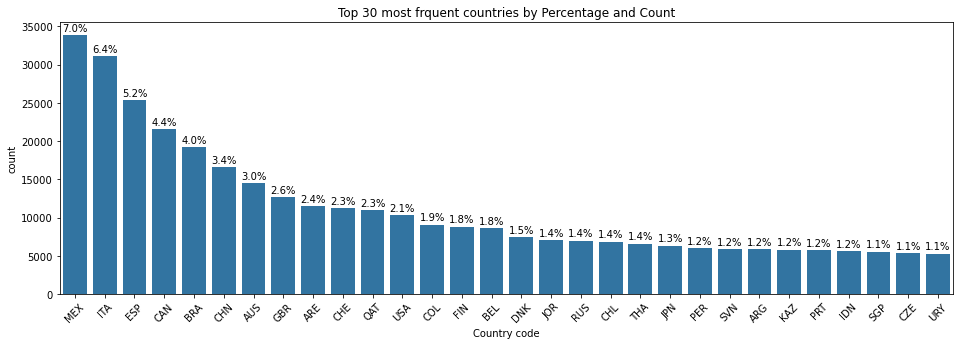

In [321]:
countries_order = countries_count_desc.index[:NUMBER_OF_COUNTRIES]
plt.figure(figsize=[16,5])
base_color = sb.color_palette()[0]

sb.countplot(data=df_pisa, x='country_code', 
             color=base_color, order=countries_order);
countries_count_desc = countries_count_desc[:NUMBER_OF_COUNTRIES]

locs, labels = plt.xticks(rotation=45)
plt.xlabel('Country code')
plt.title('Top 30 most frquent countries by Percentage and Count')

for loc, label in zip(locs, labels):
    count = countries_count_desc[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_countries)
    plt.text(loc, count + 550, pct_string, ha = 'center', color = 'black')
plt.savefig('./images/top-30-frquent-countries.png')
plt.show()

The top 3 most frequent countries are `Mexico`, `Italy` and `Spain`

#### Gender distribution between studunets

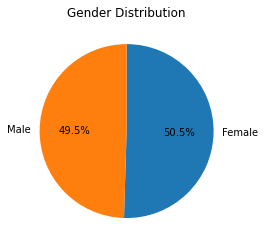

In [323]:
#create pie chart
gender_counts = df_pisa['gender'].value_counts()
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.title('Gender Distribution')

plt.savefig('./images/gender-dist.png');

Percentage of gender distribution is almost same

In [ ]:
na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis=1).isna().sum()
print(na_counts)

In [401]:
tick_props = np.arange(0, 500+50, 50)
tick_props
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00',
 '50.00',
 '100.00',
 '150.00',
 '200.00',
 '250.00',
 '300.00',
 '350.00',
 '400.00',
 '450.00',
 '500.00']

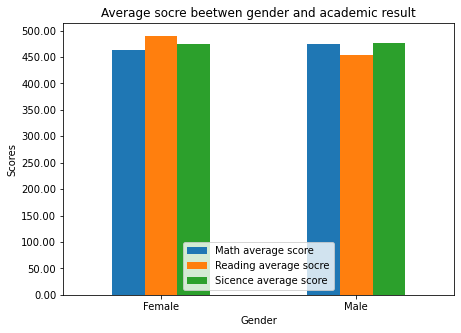

In [414]:
result = df_pisa.groupby(['gender']).mean()[['pv_math_avg_score', 'pv_reading_avg_score', 'pv_science_avg_score']]
result.rename({'pv_math_avg_score': 'Math average score', 'pv_reading_avg_score': 'Reading average socre', 'pv_science_avg_score': 'Sicence average score'}, axis = 1, inplace=True)
ax = result.plot.bar(figsize=[7, 5])
plt.title('Average socre beetwen gender and academic result');
plt.ylabel('Scores');
plt.xlabel('Gender');
plt.xticks(rotation=0);
plt.yticks(tick_props, tick_names);
plt.savefig('./images/barplot-math-gender.png');

Average academic scores of both genders are almost same. we can only see slight higher value in `female reading`

### Plausable average score value distributions

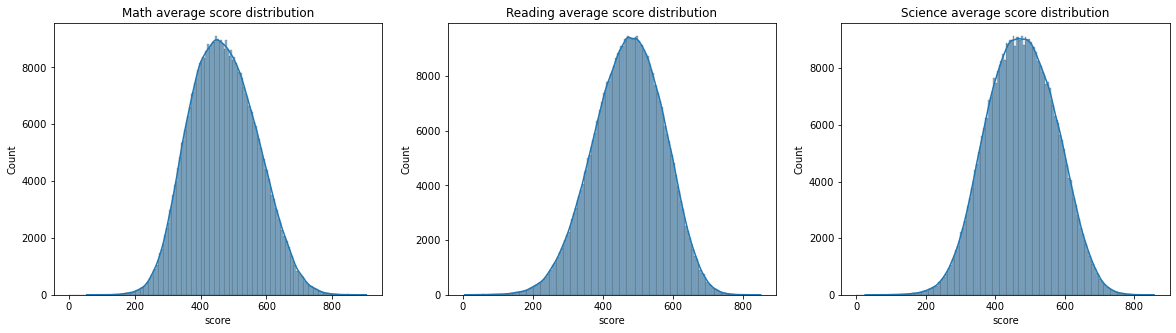

In [415]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 3, 1)
bins = np.arange(0, df_pisa['pv_math_avg_score'].max() + 5, 5)
sb.histplot(data=df_pisa, x="pv_math_avg_score", bins = bins, kde=True)
plt.xlabel('score')
plt.title('Math average score distribution');

plt.subplot(1, 3, 2)
bins = np.arange(0, df_pisa['pv_reading_avg_score'].max() + 5, 5)
sb.histplot(data=df_pisa, x="pv_reading_avg_score", bins = bins, kde=True)
plt.xlabel('score')
plt.title('Reading average score distribution');

plt.subplot(1, 3, 3)
bins = np.arange(0, df_pisa['pv_science_avg_score'].max() + 5, 5)
sb.histplot(data=df_pisa, x="pv_science_avg_score", bins = bins, kde=True)
plt.xlabel('score')
plt.title('Science average score distribution');

plt.savefig('./images/academic-avg-dis.png');

Wow, all the average score distributions are normally distributed. The peak for all academics between 420 and 460.

#### Employment proportion of parents.

In [439]:
def draw_donut_pie_chart (sorted_counts, title, startangle, position):
    plt.subplot(1, 2, position)
    sb.set(font_scale = 1.25)
    # plt.figure(figsize = [10, 5])
    patches, texts, pcts =plt.pie(sorted_counts, startangle = startangle, 
                                  labels = sorted_counts.index, counterclock = False,
                                  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                  autopct='%1.1f%%');
    plt.axis('square');
    plt.title(title, size = 20)
    #draw circle
    center_circle = plt.Circle((0, 0), 0.40, fc = 'white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.setp(pcts, color='white', fontweight='bold');
    

In [430]:
sorted_father_counts = df_pisa['father_current_job_status'].value_counts()
sorted_father_counts
sorted_mother_counts = df_pisa['mother_current_job_status'].value_counts()
sorted_mother_counts

Working full-time <for pay>            219095
Other (e.g. home duties, retired)      138841
Working part-time <for pay>             78237
Not working, but looking for a job      31578
Name: mother_current_job_status, dtype: int64

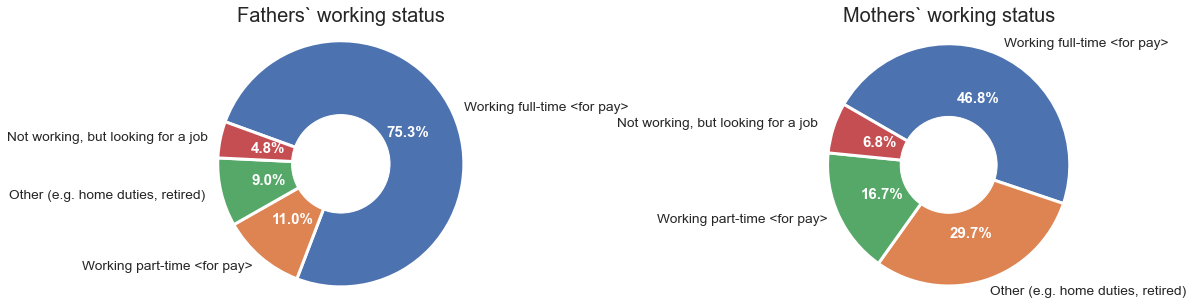

In [443]:
plt.figure(figsize = [20, 5])
draw_donut_pie_chart(sorted_father_counts, 'Fathers` working status', 160, 1)
draw_donut_pie_chart(sorted_mother_counts, 'Mothers` working status', 150, 2)
plt.savefig('./images/parent-working-status.png');

More fathers' have full-time job than mothers. It seems mothers have more home duties than fathers. Unemployment rate is low for both of the genders which is very good.

### Parents' education level

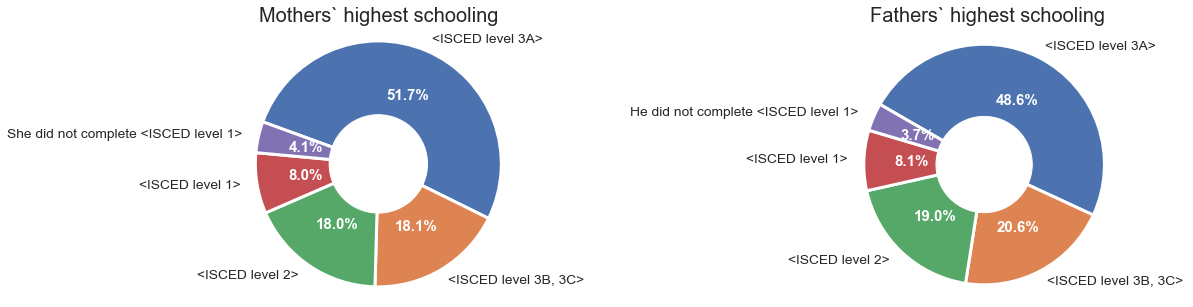

In [446]:
plt.figure(figsize = [20, 5])
draw_donut_pie_chart(df_pisa.mother_highest_schooling.value_counts(), 'Mothers` highest schooling', 160, 1)
draw_donut_pie_chart(df_pisa.father_highest_schooling.value_counts(), 'Fathers` highest schooling', 150, 2)
plt.savefig('./images/parent-working-status.png');

# Birth country of parent's and self

In [535]:
def create_birth_country_proportion (column_name, title, pie_angle):    
    sb.set_style(style='white')
    plt.figure(figsize=[10, 5])
    plt.subplot(1, 2, 1)
    sb.countplot(data = df_pisa, x = column_name, 
                 order = df_pisa[column_name].value_counts().index);
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)

    plt.subplot(1, 2, 2)
    plt.pie(df_pisa[column_name].value_counts(), startangle = pie_angle, counterclock = False, autopct='%1.2f%%');

    plt.legend(df_pisa[column_name].value_counts().index, loc = 'upper right')
    plt.suptitle(title, size = 15)
    plt.tight_layout()
    plt.subplots_adjust(top = 0.9)
    plt.savefig('./images/' + column_name + '.png');

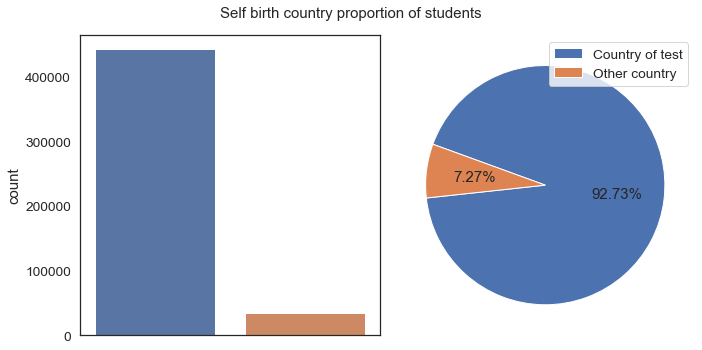

In [536]:
create_birth_country_proportion('self_birth_country', 'Self birth country proportion of students', 160)

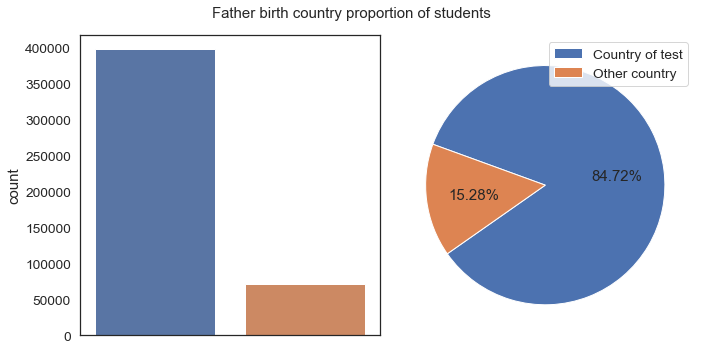

In [537]:
create_birth_country_proportion('father_birth_country', 'Father birth country proportion of students', 160)


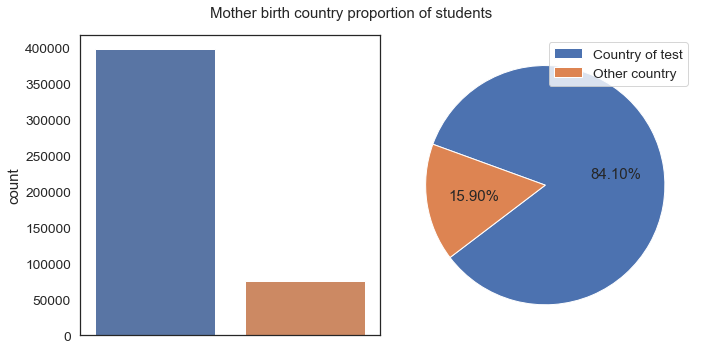

In [538]:
create_birth_country_proportion('mother_birth_country', 'Mother birth country proportion of students', 160)

Most of the parents are from test country 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Explore realationship between parents at home or not and academic scores

In [515]:
res = df_pisa['father_at_home'] + df_pisa['mother_at_home']
res.replace({0: 'No parent', 1: 'Father or Mother', 2: 'Father and Mother'}, inplace = True)
res.head(2)

0    Father and Mother
1    Father and Mother
dtype: object

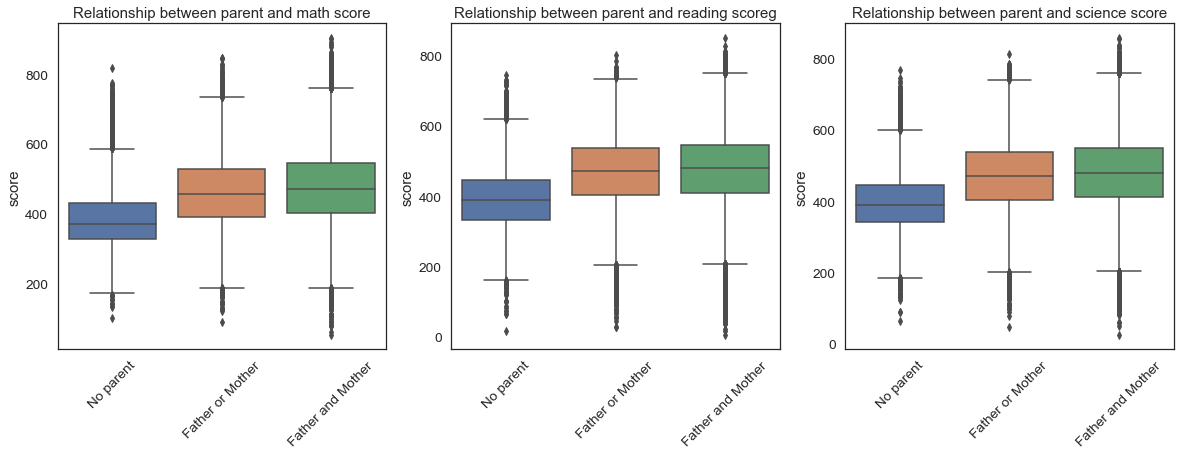

In [534]:
plt.figure(figsize = [20, 6])
sb.set_style(style='white')
base_color = sb.color_palette()[0]
order = ['No parent', 'Father or Mother', 'Father and Mother']
plt.subplot(1, 3, 1)
plt.xticks(rotation=45)
sb.boxplot(x = res, y = df_pisa['pv_math_avg_score'], order=order);
plt.ylabel('score')
plt.title('Relationship between parent and math score');
plt.subplot(1, 3, 2)
plt.xticks(rotation=45)
sb.boxplot(x = res, y = df_clean['pv_reading_avg_score'], order=order);
plt.ylabel('score')
plt.title('Relationship between parent and reading scoreg');
plt.subplot(1, 3, 3)
plt.xticks(rotation=45)
sb.boxplot(x = res, y = df_clean['pv_science_avg_score'], order=order);
plt.ylabel('score')
plt.title('Relationship between parent and science score');
plt.savefig('./images/parental-companionship.png');

It seems above that, student who has at least `Father/Mother` is likely to get higher score than `No parent` situation. This is proof that parents companionship play an essential

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!